<a href="https://colab.research.google.com/github/dnevo/Practicum/blob/master/S09_ML_for_Business_predict_volume_of_new_oil_wells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Review

Hi Doron. This is Soslan again. I'm reviewing your next project. I've added all my comments to new cells with different coloring.

<div class="alert alert-success" role="alert">
  If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work so I can accept it then the color will be red
</div>

Your project is of high quality. The code is clean and very compact. All the functions are done correctly. You just missed one task, but it is the easiest one and doesn't worth another iteration. So I'm accepting your project.

---

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st

# 1. Download and Data preparation

There are 3 CSV Data files: `geo_data0.csv`, `geo_data1.csv`and `geo_data2.csv`, represention 3 regions: Region 0, Region 1 and Region 2.

In order to avoid code duplication, we will load them in a loop. This principle will also be used in next parts of the project.

The `id` column will be dropped since it is a string of text, and working instead with integer index is easier.

In [ ]:
data = []
for i in range(3):
  data.append(pd.read_csv(
      'https://code.s3.yandex.net/datasets/geo_data_' + str(i) + '.csv'
      ,usecols = ['f0','f1','f2','product']))

## Brief EDA

As below in the descriptive statistics and comparative box plot, Region 1 reserve volume (`product`) is quite different from the 2 other regions:
- It has lower average - hinting on lower profitability
- It has denser distribution - pointing on better predictability, and lower risk.

We will further explore and confirm these 2 observations in following section.

In [ ]:
for i in range(3):
  print(f'\n#### Region {i} ####')
  print(data[i].describe())


#### Region 0 ####
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

#### Region 1 ####
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985 

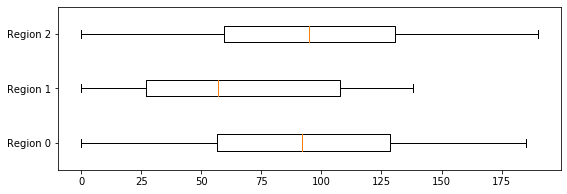

In [ ]:
plt.figure(figsize=(9, 3))
plt.boxplot([data[0]['product'], data[1]['product'], data[2]['product']], vert=False)
plt.yticks([1,2,3],labels=['Region 0','Region 1','Region 2'])
plt.show()

<div class="alert alert-success" role="alert">
Great start. Nice automation of the process.</div>

# 2. Train and Test
1. Split the data into a training set and validation set at a ratio of 75:25.
2. Train the model and make predictions for the validation set.
3. Save the predictions and correct answers for the validation set.
4. Print the average volume of reserves and model RMSE.

In [ ]:
state = np.random.RandomState(12345)
target_valids = []  # to be used later in bootstrapping
predicted_valids = [] # to be used later in bootstrapping
for i in range(3):
  target = data[i]['product']
  features = data[i].drop('product', axis=1)
  features_train, features_valid, target_train, target_valid = train_test_split(
      features, target, test_size=0.25, random_state=state)
  model = LinearRegression()
  model.fit(features_train, target_train)
  predicted_valid = model.predict(features_valid)
  print(f'\n#### Region {i} ####')
  print('RMSE:', sqrt(mean_squared_error(target_valid, predicted_valid)))
  print('mean target_valid:', target_valid.mean())
  print('mean predicted_valid:', predicted_valid.mean())
  target_valids.append(target_valid)
  predicted_valids.append(predicted_valid)
reserves = []
for i in range(3):
  reserves.append(pd.DataFrame({'target':target_valids[i], 'predicted':predicted_valids[i]}))


#### Region 0 ####
RMSE: 37.5794217150813
mean target_valid: 92.07859674082927
mean predicted_valid: 92.59256778438038

#### Region 1 ####
RMSE: 0.889736773768064
mean target_valid: 68.77162424984647
mean predicted_valid: 68.76995145799754

#### Region 2 ####
RMSE: 39.958042459521614
mean target_valid: 94.74895871720241
mean predicted_valid: 95.087528122523


5. Analyze the results - refer to above printout:

As already hinted, Region 1 reserve volume (`product`) is different from the 2 other regions:
- Lower Mean --> lower potential profitability
- Lower RMSE --> reasonable predictability, and lower risk. 

**The 2 other regions suffer from high RMSE.**

<div class="alert alert-success" role="alert">
Second step is done correctly.</div>

Prepare for profit calculation:

Key values for calculation, including number of wells:

In [ ]:
N_SAMPLES = 1000
SAMPLE_SIZE = 500
TOTAL_BUDGET = 100000000
WELL_COST = 500000
BARREL_PRICE = 4.5
N_WELLS = int(TOTAL_BUDGET / WELL_COST) # = 200

Function to calculate profit from a set of selected oil wells and model predictions:

In [ ]:
def calc_profit(target, predicted):
  n_barrels = target[pd.Series(predicted).sort_values(ascending=False).index][:N_WELLS].sum() * 1000
  revenue = n_barrels * BARREL_PRICE
  cost = N_WELLS * WELL_COST
  return revenue - cost

<div class="alert alert-warning" role="alert">
You missed this task: 

3.2. Calculate the minimum average volume of reserves in the oil wells of the region, sufficient for its development. Provide the findings.
</div>

# 4. Risks and profits for each region:

Profit per region:

In [ ]:
profits = []
for i in range(3):
  profit = []
  for j in range(N_SAMPLES):
    subsample = reserves[i].sample(n=SAMPLE_SIZE, replace=False, random_state=state)
    profit.append(calc_profit(subsample['target'].values, subsample['predicted'].values))
  profits.append(pd.Series(profit))
  print(f'Region{i} - Mean profit:{pd.Series(profit).mean()}')

Region0 - Mean profit:3845255.0587950097
Region1 - Mean profit:4650508.330289074
Region2 - Mean profit:3534133.720062032


The boxplots can already provide hint that Region 0 and Region 1 are risky (chance for profit losts):

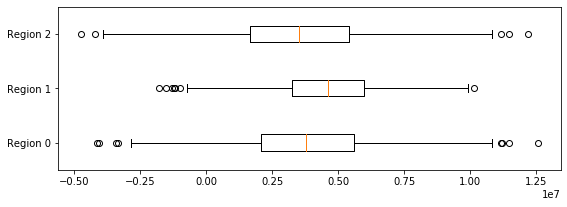

In [ ]:
plt.figure(figsize=(9, 3))
plt.boxplot([profits[0], profits[1], profits[2]], vert=False)
plt.yticks([1,2,3],labels=['Region 0','Region 1','Region 2'])
plt.show()

95% confidence interval:

In [ ]:
for i in range(3):
  print(f'Region {i} confidence interval =',st.t.interval(0.95, len(profits[i])-1, loc=profits[i].mean(),scale=profits[i].sem()))

Region 0 confidence interval = (3681962.254097969, 4008547.8634920507)
Region 1 confidence interval = (4524972.248542842, 4776044.412035306)
Region 2 confidence interval = (3366157.099843373, 3702110.3402806907)


Risk for loss per region:

In [ ]:
for i in range(3):
  print(f'Region {i}, risk for loss: {sum(profits[i]<0)/N_SAMPLES:0.1%}')

Region 0, risk for loss: 8.1%
Region 1, risk for loss: 1.0%
Region 2, risk for loss: 9.6%


# Conclusions

As above, Region 0 and Region 2 impose a risk of loss which is higher than 2.5% (6.3% and 10%).
<br>**Therefore Region 1 is selected for development.**

<div class="alert alert-success" role="alert">
Great last step
</div>